In [1]:
import pandas as pd
import pyfredapi as pf
from dotenv import load_dotenv
import csv
load_dotenv()

True

In [2]:
extra_parameters = {
    "observation_start": "1990-01-01",
    "observation_end": "2023-12-31",
}

In [20]:
list_series_id = [
    "CPIAUCSL",
    "UNRATE",
    "FEDFUNDS",
    "M1SL",
    "MRTSSM44000USS",
    "UMCSENT",
    "PCUOMFGOMFG",
    "W875RX1",
    "M2SL",
    "DTCTHFNM",
    "AMBSL",
    "BUSLOANS",
    "PCU311311",
    "BOPGSTB",
    "TWEXMMTH",
    "USASARTMISMEI",
    "IR",
    "IQ",
    "IMPGS",
    "NETEXP",
    "OECDCPALTT01GYM",
    "CMRMTSPL",
    "INDPRO",
    "PERMIT",
    "GPDIC1",
    "MTSDS133FMS",
    "POILBREUSDM",
    "GS10",
    "NONBORRES",
    "CES0600000007"
]

In [21]:
sc = pf.SeriesCollection(series_id=list_series_id, **extra_parameters)

Requesting series CPIAUCSL...
Requesting series UNRATE...
Requesting series FEDFUNDS...
Requesting series M1SL...
Requesting series MRTSSM44000USS...
Requesting series UMCSENT...
Requesting series PCUOMFGOMFG...
Requesting series W875RX1...
Requesting series M2SL...
Requesting series DTCTHFNM...
Requesting series AMBSL...
Requesting series BUSLOANS...
Requesting series PCU311311...
Requesting series BOPGSTB...
Requesting series TWEXMMTH...
Requesting series USASARTMISMEI...
Requesting series IR...
Requesting series IQ...
Requesting series IMPGS...
Requesting series NETEXP...
Requesting series OECDCPALTT01GYM...
Requesting series CMRMTSPL...
Requesting series INDPRO...
Requesting series PERMIT...
Requesting series GPDIC1...
Requesting series MTSDS133FMS...
Requesting series POILBREUSDM...
Requesting series GS10...
Requesting series NONBORRES...
Requesting series CES0600000007...


In [22]:
sc.list_series()

CPIAUCSL: Consumer Price Index for All Urban Consumers: All Items in U.S. City Average

UNRATE: Unemployment Rate

FEDFUNDS: Federal Funds Effective Rate

M1SL: M1

MRTSSM44000USS: Retail Sales: Retail Trade

UMCSENT: University of Michigan: Consumer Sentiment

PCUOMFGOMFG: Producer Price Index by Industry: Total Manufacturing Industries

W875RX1: Real personal income excluding current transfer receipts

M2SL: M2

DTCTHFNM: Total Consumer Loans and Leases Owned and Securitized by Finance Companies, Level

AMBSL: St. Louis Adjusted Monetary Base (DISCONTINUED)

BUSLOANS: Commercial and Industrial Loans, All Commercial Banks

PCU311311: Producer Price Index by Industry: Food Manufacturing

BOPGSTB: Trade Balance: Goods and Services, Balance of Payments Basis

TWEXMMTH: Nominal Major Currencies U.S. Dollar Index (Goods Only) (DISCONTINUED)

USASARTMISMEI: Sales: Retail Trade: Total Retail Trade: Volume for United States

IR: Import Price Index (End Use): All Commodities

IQ: Export Price Index (End Use): All Commodities

IMPGS: Imports of Goods and Services

NETEXP: Net Exports of Goods and Services

OECDCPALTT01GYM: Consumer Price Index: All Items: Total

CMRMTSPL: Real Manufacturing and Trade Industries Sales

INDPRO: Industrial Production: Total Index

PERMIT: New Privately-Owned Housing Units Authorized in Permit-Issuing Places: Total Units

GPDIC1: Real Gross Private Domestic Investment

MTSDS133FMS: Federal Surplus or Deficit [-]

POILBREUSDM: Global price of Brent Crude

GS10: Market Yield on U.S. Treasury Securities at 10-Year Constant Maturity, Quoted on an Investment Basis

NONBORRES: Reserves of Depository Institutions, Nonborrowed

CES0600000007: Average Weekly Hours of Production and Nonsupervisory Employees, Goods-Producing

In [23]:
df=sc.merge_wide().set_index("date").pct_change(periods=12)
df=df[df.index>="1991-01-01"]

In [24]:
df.columns

Index(['CPIAUCSL', 'UNRATE', 'FEDFUNDS', 'M1SL', 'MRTSSM44000USS', 'UMCSENT',
       'PCUOMFGOMFG', 'W875RX1', 'M2SL', 'DTCTHFNM', 'AMBSL', 'BUSLOANS',
       'PCU311311', 'BOPGSTB', 'TWEXMMTH', 'USASARTMISMEI', 'IR', 'IQ',
       'IMPGS', 'NETEXP', 'OECDCPALTT01GYM', 'CMRMTSPL', 'INDPRO', 'PERMIT',
       'GPDIC1', 'MTSDS133FMS', 'POILBREUSDM', 'GS10', 'NONBORRES',
       'CES0600000007'],
      dtype='object')

<Axes: xlabel='date'>

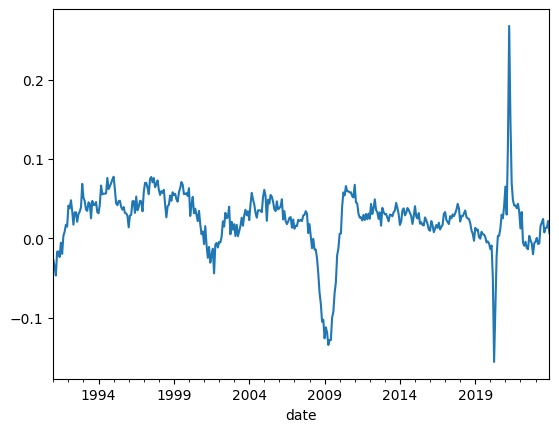

In [25]:
df['CMRMTSPL'].plot()

In [26]:
df.to_csv('./data/inputs_rf.csv', index=True)